<a href="https://colab.research.google.com/github/eruru0411/git-test/blob/master/_Pandas_%ED%95%9C%EB%B2%88%EC%97%90_%EC%A0%9C%EB%8C%80%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EA%B8%B0_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 한번에 제대로 배우기




---



- 관계 또는 레이블링 데이터로 쉽고 직관적으로 작업할 수 있도로 고안된 빠르고 유연하며 표현력이 뛰어난 데이터 구조를 제공하는 Python 패키지

## Pandas 특징 
- 부동 소수점이 아닌 데이터 뿐만 아니라 부동 소수점 데이터에서도 결측 데이터(NaN으로 표시됨)를 쉽게 처리
- 크기 변이성(Size mutability): DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
- 자동 및 명시적(explici) 데이터 정렬 : 객체를 라벨 집합에 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series, DataFrame 등의 계산에서 자동으로 데이터 조정 가능
- 데이터 세트에서 집계 및 변환을 위한 분할(split), 적용(apply), 결합(combine) 작업을 수행할 수 있는 강력하고 유연한 groupby 함수 제공
- 누락된 데이터 또는 다른 Python 및 Numpy 데이터 구조에서 서로 다른 인덱싱 데이터를 DataFrame 개체로 쉽게 변환
- 대용량 데이터 세트의 지능형 라벨 기반 슬라이싱, 고급 인덱싱 및 부분 집합 구하기 가능
- 직관적인 데이터 세트 병합 및 결합
- 데이터 세트의 유연한 재구성 및 피벗
- 축의 계층적 라벨링(눈금당 여러 개의 라벨을 가질 수 있음)
- 플랫 파일(csv 및 구분), excel파일, 데이터베이스 로딩 및 초고속 HDF5 형식의 데이터 저장/로드에 사용되는 강력한 IO도구
- 시계열 특정 기능 : 날짜 범위 생성 및 주파수 변환, 무빙 윈도우(moving window)통계, 날짜 이동 및 지연

## Pandas 객체


In [2]:
#pandas는 numpy기반으로 만들어짐
import numpy as np
import pandas as pd
pd.__version__

'1.1.5'

### Series 객체
- 하나의 단일한 형태의 객체

In [3]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [4]:
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [5]:
s.index #범위로 인덱스 구성

RangeIndex(start=0, stop=5, step=1)

In [6]:
s[1]

0.25

In [7]:
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [8]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e'])  #인덱스 지정 가능
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [9]:
s['c']

0.5

In [11]:
s[['c', 'd', 'e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [12]:
'b' in s

True

In [13]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=[2, 4, 6, 8, 10])
s

2     0.00
4     0.25
6     0.50
8     0.75
10    1.00
dtype: float64

In [14]:
s[4]

0.25

In [15]:
s[2:]

6     0.50
8     0.75
10    1.00
dtype: float64

In [16]:
s.unique() #unique한 값만 출력해줌

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [17]:
s.value_counts() #갯수 세기

1.00    1
0.75    1
0.50    1
0.25    1
0.00    1
dtype: int64

In [18]:
s.isin([0.25, 0.75]) #boolean형태로 반환

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [20]:
pop_tuple = {'서울특별시':9720846,
             '부산광역시':3404423,
             '인천광역시':2947217,
             '대구광역시':2427954,
             '대전광역시':1471040,
             '광주광역시':1455048}
population = pd.Series(pop_tuple) #tuple -> Series
population

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
dtype: int64

In [21]:
population['서울특별시']

9720846

In [26]:
population['서울특별시':'인천광역시']
#population[:3]

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
dtype: int64

### DataFrame 객체
- 여러 컬럼이 들어간 2차원 형태 가능

In [27]:
pd.DataFrame([{'A':2, 'B':4, 'D':3}, {'A':4, 'B':5, 'C':7}]) #누락값 NaN처리

,A,B,D,C
0,2,4,3.0,NaN
1,4,5,NaN,7.0


In [30]:
pd.DataFrame(np.random.rand(5, 5),
             columns=['A', 'B', 'C', 'D', 'E'],
             index = [1, 2, 3, 4, 5])

,A,B,C,D,E
1,0.508376,0.930974,0.378971,0.597871,0.666664
2,0.096621,0.228811,0.983507,0.185355,0.251051
3,0.939528,0.326785,0.438576,0.085808,0.031431
4,0.211764,0.756668,0.160733,0.271381,0.066691
5,0.607469,0.808137,0.483088,0.008616,0.412902


In [31]:
male_tuple = {'서울특별시':4732275,
             '부산광역시':1668618,
             '인천광역시':1476813,
             '대구광역시':1198815,
             '대전광역시':734441,
             '광주광역시':720060}
male = pd.Series(male_tuple)
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
dtype: int64

In [32]:
female_tuple = {'서울특별시':4988571,
             '부산광역시':1735805,
             '인천광역시':1470404,
             '대구광역시':1229139,
             '대전광역시':736599,
             '광주광역시':734988}
female = pd.Series(female_tuple)
female

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
dtype: int64

In [34]:
korea_df = pd.DataFrame({'인구수':population,
                         '남자인구수':male,
                         '여자인구수':female})
korea_df
#여러 시리즈가 결합하여 한 컬럼이 하나의 시리즈를 구성하는 dataframe 형태

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,734441,736599
광주광역시,1455048,720060,734988


In [35]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시'], dtype='object')

In [36]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [37]:
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [39]:
korea_df['서울특별시':'인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3404423,1668618,1735805
인천광역시,2947217,1476813,1470404


### Index 객체
- Index : 일반적인 index 객체이며, numpy 배열 형식으로 축의 이름 표현
- Int64Index
- MultiIndex
- DatetimeIndex
- PeriodIndex

In [40]:
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [41]:
idx[1]

4

In [47]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [44]:
idx[-1::]

Int64Index([10], dtype='int64')

In [45]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [48]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

- append 
- difference
- intersection
- union
- isin
- delete
- drop
- insert
- is_monotonic
- is_unique
- unique 


In [60]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])
print(idx1.append(idx2)) #결합됨
print(idx1.difference(idx2)) #차집합
print(idx1- idx2)
print(idx1.intersection(idx2)) #교집합
print(idx1 & idx2)
print(idx1.union(idx2)) #합집합(중복허용x)
print(idx1 | idx2)
print(idx1.delete(0))
print(idx1.drop(1))
print(idx1^idx2) #여집합

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')




---



## 인덱싱(Indexing)

In [61]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [62]:
s['b']

0.25

In [63]:
'b' in s

True

In [64]:
s.items() #묶여서 나옴

In [65]:
list(s.items()) #리스트 형태로 뽑아져서 나옴

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [66]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [67]:
s['a':'d']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [68]:
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [70]:
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [71]:
s[['a', 'c', 'e']]

a    0.0
c    0.5
e    1.0
dtype: float64

### Series 인덱싱

In [73]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
              index=[1, 3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [74]:
s[1]

'a'

In [75]:
s[2:4]

5    c
7    d
dtype: object

In [76]:
s.iloc[1]

'b'

In [77]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [78]:
s.reindex(range(10)) #index 재구성. 긱존에 없는 값은 NaN처리

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [82]:
s.reindex(range(10), method='bfill') #bfill : 결측값을 뒷방향으로 채움 (backfill)

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱


Saving indexing.png to indexing.png


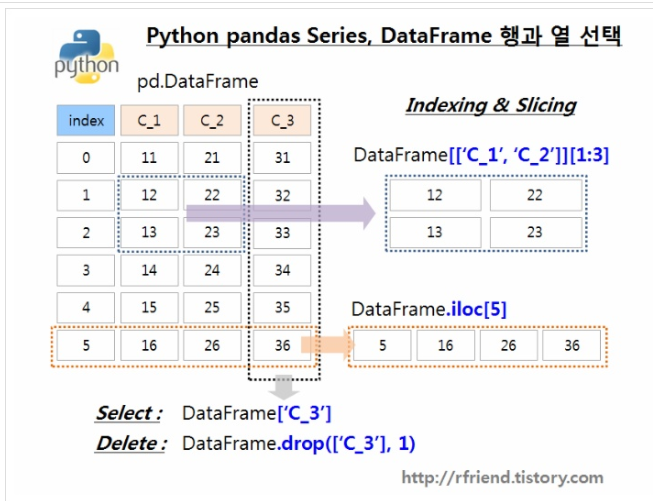

In [90]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행
from IPython.display import Image
Image('indexing.png')

In [91]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [92]:
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     734441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [93]:
korea_df.여자인구수

서울특별시    4988571
부산광역시    1735805
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [94]:
korea_df['남여비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])  #새로운 column 추가

In [95]:
korea_df.남여비율

서울특별시     94.862336
부산광역시     96.129346
인천광역시    100.435867
대구광역시     97.532907
대전광역시     99.707032
광주광역시     97.968946
Name: 남여비율, dtype: float64

In [97]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.40442300e+06, 1.66861800e+06, 1.73580500e+06, 9.61293463e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.34441000e+05, 7.36599000e+05, 9.97070319e+01],
       [1.45504800e+06, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [98]:
korea_df.T #전치

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시,광주광역시
인구수,9.720846e+06,3.404423e+06,2.947217e+06,2.427954e+06,1.471040e+06,1.455048e+06
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.344410e+05,7.200600e+05
여자인구수,4.988571e+06,1.735805e+06,1.470404e+06,1.229139e+06,7.365990e+05,7.349880e+05
남여비율,9.486234e+01,9.612935e+01,1.004359e+02,9.753291e+01,9.970703e+01,9.796895e+01


In [99]:
korea_df.values[0] #서울특별시만 추출

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [100]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3404423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시    1455048
Name: 인구수, dtype: int64

In [102]:
korea_df.loc[:'인천광역시', :'남자인구수']
#loc : index label을 가지고 행(row) 선택할 때 loc[인덱스값, 컬럼명]
#iloc : index의 label 이 아니라 정수(integer)로 indexing을 할 때 iloc[인덱스] loc[값]  

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


In [103]:
korea_df.loc[(korea_df.여자인구수)> 1000000]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [105]:
korea_df.loc[(korea_df.인구수)<2000000]

,인구수,남자인구수,여자인구수,남여비율
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [109]:
korea_df.loc[korea_df.인구수>=2500000]

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867


In [110]:
korea_df.loc[korea_df.남여비율>100]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [113]:
korea_df.loc[(korea_df.인구수>2500000) & (korea_df.남여비율>100)]

,인구수,남자인구수,여자인구수,남여비율
인천광역시,2947217,1476813,1470404,100.435867


In [118]:
korea_df.iloc[:3,:2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3404423,1668618
인천광역시,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [119]:
korea_df

,인구수,남자인구수,여자인구수,남여비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3404423,1668618,1735805,96.129346
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,734441,736599,99.707032
광주광역시,1455048,720060,734988,97.968946


In [121]:
idx_tuples = [('서울특별시', 2010), ('서울특별시', 2020), 
              ('부산광역시', 2010), ('부산광역시', 2020), 
              ('인천광역시', 2010), ('인천광역시', 2020), 
              ('대구광역시', 2010), ('대구광역시', 2020), 
              ('대전광역시', 2010), ('대전광역시', 2020), 
              ('광주광역시', 2010), ('광주광역시', 2020)]
idx_tuples



[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [122]:
pop_tuples = [10312545, 9720846,
              3567910, 3404423,
              2758296, 2947217,
              2511676, 2427954,
              1503664, 1471040, 
              1454636, 1455048]
population = pd.Series(pop_tuples, index=idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     3567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [123]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [124]:
population = population.reindex(midx) #multiindex로 reindex
population 

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     3567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [125]:
population[:, 2010]

서울특별시    10312545
부산광역시     3567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [127]:
population['대전광역시', :]

2010    1503664
2020    1471040
dtype: int64

In [128]:
korea_mdf = population.unstack() #데이터프레임 출력으로 바꿔줌
korea_mdf

,2010,2020
광주광역시,1454636,1455048
대구광역시,2511676,2427954
대전광역시,1503664,1471040
부산광역시,3567910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


In [129]:
korea_mdf.stack() #다중인덱싱 구조로 바뀜

광주광역시  2010     1454636
       2020     1455048
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     3567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [131]:
male_tuples = [5111259, 4732275, 
              1773170, 1668618, 
              1390356, 1476813,
              1255245, 1198815, 
              753648, 734441, 
              721780, 720060]
male_tuples

[5111259,
 4732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441,
 721780,
 720060]

In [133]:
korea_mdf = pd.DataFrame({'총인구수':population,
                          '남자인구수':male_tuples})
korea_mdf

총인구수    남자인구수
서울특별시 2010  10312545  5111259
      2020   9720846  4732275
부산광역시 2010   3567910  1773170
      2020   3404423  1668618
인천광역시 2010   2758296  1390356
      2020   2947217  1476813
대구광역시 2010   2511676  1255245
      2020   2427954  1198815
대전광역시 2010   1503664   753648
      2020   1471040   734441
광주광역시 2010   1454636   721780
      2020   1455048   720060

In [134]:
female_tuples = [5201286, 4988571, 
              1794740, 1735805, 
              1367940, 1470404,
              1256431, 1229139, 
              750016, 736599, 
              732856, 734988]
female_tuples

[5201286,
 4988571,
 1794740,
 1735805,
 1367940,
 1470404,
 1256431,
 1229139,
 750016,
 736599,
 732856,
 734988]

In [135]:
korea_mdf = pd.DataFrame({'총인구수':population,
                          '남자인구수':male_tuples,
                          '여자인구수':female_tuples})
korea_mdf

총인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5201286
      2020   9720846  4732275  4988571
부산광역시 2010   3567910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   2511676  1255245  1256431
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   734441   736599
광주광역시 2010   1454636   721780   732856
      2020   1455048   720060   734988

In [136]:
ratio = korea_mdf['남자인구수']*100/korea_mdf['여자인구수']
ratio

서울특별시  2010     98.269140
       2020     94.862336
부산광역시  2010     98.798155
       2020     96.129346
인천광역시  2010    101.638668
       2020    100.435867
대구광역시  2010     99.905606
       2020     97.532907
대전광역시  2010    100.484256
       2020     99.707032
광주광역시  2010     98.488653
       2020     97.968946
dtype: float64

In [137]:
ratio.unstack()

,2010,2020
광주광역시,98.488653,97.968946
대구광역시,99.905606,97.532907
대전광역시,100.484256,99.707032
부산광역시,98.798155,96.129346
서울특별시,98.269140,94.862336
인천광역시,101.638668,100.435867


In [139]:
korea_mdf = pd.DataFrame({'총인구수':population,
                          '남자인구수':male_tuples,
                          '여자인구수':female_tuples,
                          '남녀비율':ratio})
korea_mdf

총인구수    남자인구수    여자인구수        남녀비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  4732275  4988571   94.862336
부산광역시 2010   3567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256431   99.905606
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720060   734988   97.968946

#### 다중 인덱스 생성

In [140]:
df = pd.DataFrame(np.random.rand(6, 3),
                  index=[['a', 'a', 'b', 'b', 'c', 'c'], [1, 2, 1, 2, 1, 2]],
                  columns=['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.561311  0.450822  0.157968
  2  0.800739  0.550675  0.035439
b 1  0.045061  0.126845  0.821641
  2  0.197078  0.468706  0.296151
c 1  0.060906  0.449904  0.968802
  2  0.777559  0.366774  0.016230

#### 인덱싱 및 슬라이싱

#### 다중 인덱스 재정렬

## 데이터 연산

### 연산자 범용 함수


#### add()

#### sub() / subtract()

#### mul() / multply()




#### truediv() /  div() / divide() / floordiv()

#### mod()

#### pow()

### 정렬(Sort)

### 순위(Ranking)


### 고성능 연산

## 데이터 결합

### Concat() / Append()

### 병합과 조인

## 데이터 집계와 그룹 연산

#### 집계 연산(Aggregation)


### GroupBy 연산

### 피벗 테이블(Pivot Table)


### 범주형(Categorical) 데이터


## 문자열 연산

#### 문자열 연산자

#### 기타 연산자


#### 정규표현식


## 시계열 처리

#### 시계열 데이터 구조


### 시계열 기본

### 주기와 오프셋


### 시프트(Shift)

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

### 기간과 기간 연산

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

### 무빙 윈도우(Moving Window)

## 데이터 읽기 및 저장


### 텍스트 파일 읽기/쓰기

### 이진 데이터 파일 읽기/쓰기

## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

#### NaN: 누락된 수치 데이터

#### Null 값 처리


### 중복 제거

### 값 치환

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly